In [2]:
%pip install numpy


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
pd.set_option('display.max_columns', None)


In [5]:
sns.set(style="whitegrid")

In [93]:
df = pd.read_csv("german_credit_data.csv")

In [94]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [95]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [97]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [98]:
df.shape

(1000, 10)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [100]:
df["Job"].unique()

array([2, 1, 3, 0])

In [101]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [102]:
df.duplicated().sum()

np.int64(0)

In [105]:
df = df.dropna().reset_index(drop=True)

In [106]:
df.shape

(522, 10)

In [107]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

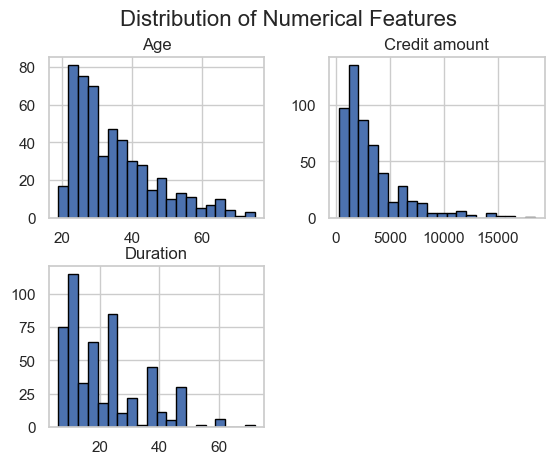

In [108]:
df[["Age", "Credit amount", "Duration"]].hist(bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()

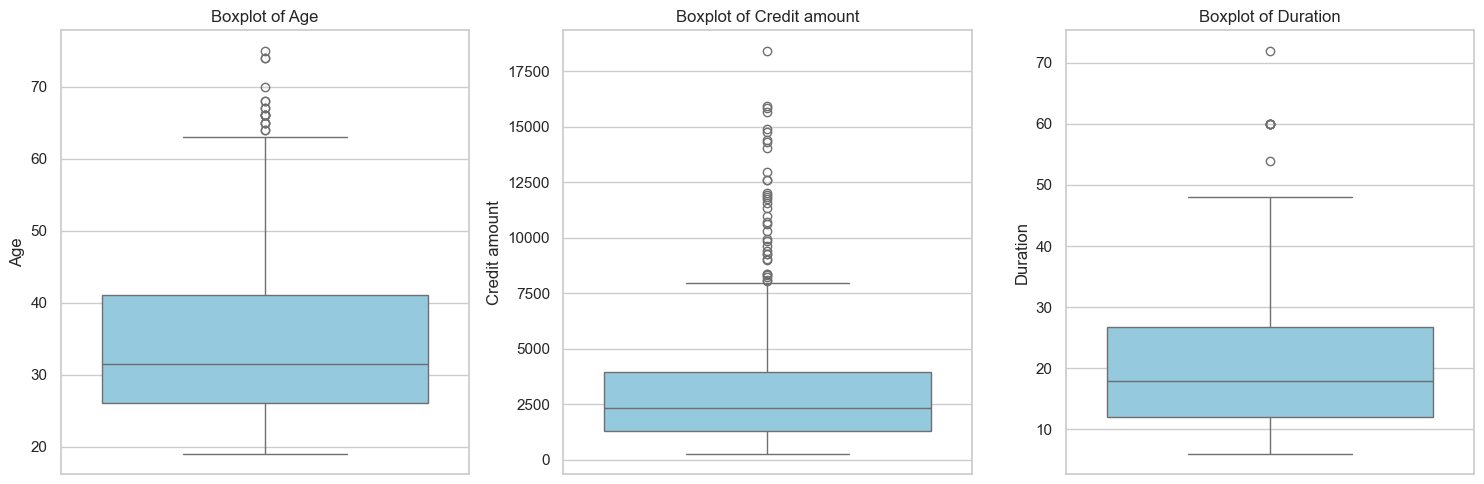

In [109]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [110]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [111]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [112]:
categorical_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

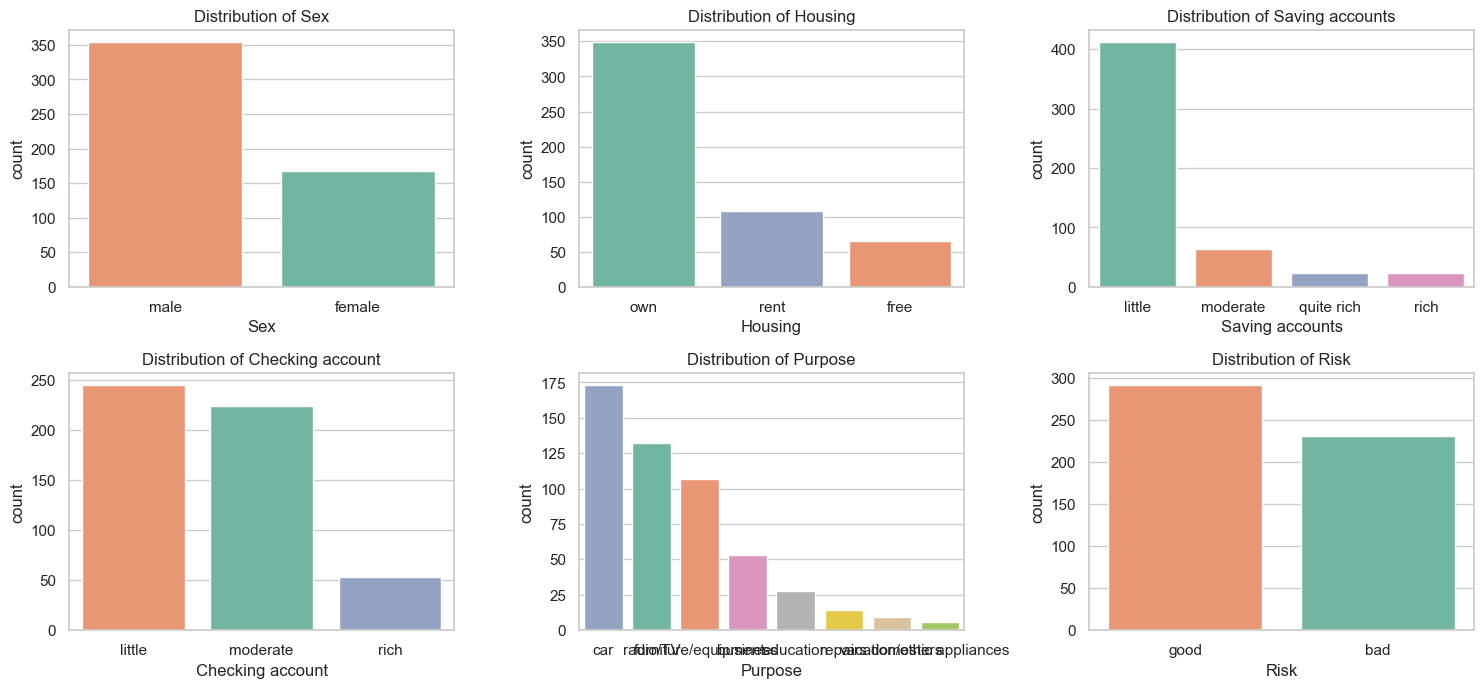

In [113]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(
        data=df, 
        x=col, 
        hue=col,            
        palette='Set2', 
        order=df[col].value_counts().index,
        legend=False        
    )
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [114]:
corr = df[["Age","Job", "Credit amount", "Duration"]].corr()

In [115]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


<Axes: >

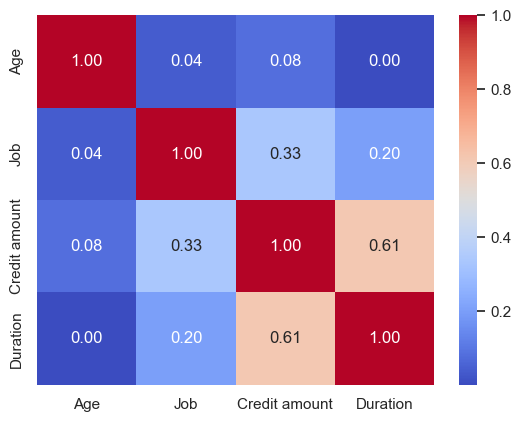

In [116]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [117]:
df.groupby("Job")["Credit amount"].mean().sort_values(ascending=False)

Job
3    5648.784810
2    3129.130990
1    2250.715517
0    1767.857143
Name: Credit amount, dtype: float64

In [118]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [119]:
df.pivot_table(values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


Text(0.5, 1.0, 'Credit Amount vs Age coloured by Sex and sized by Duration')

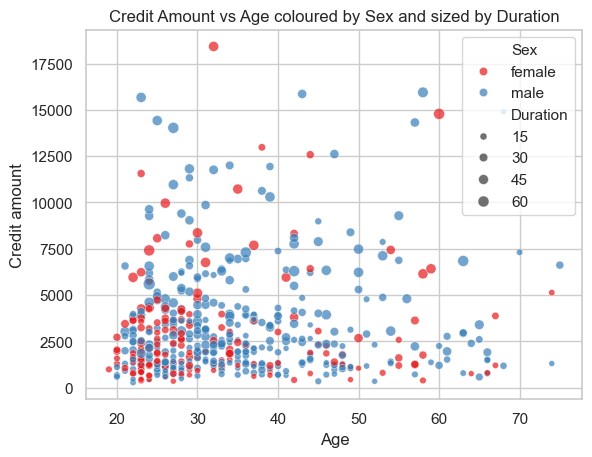

In [120]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue="Sex", size = "Duration", alpha=0.7, palette='Set1')
plt.title("Credit Amount vs Age coloured by Sex and sized by Duration")

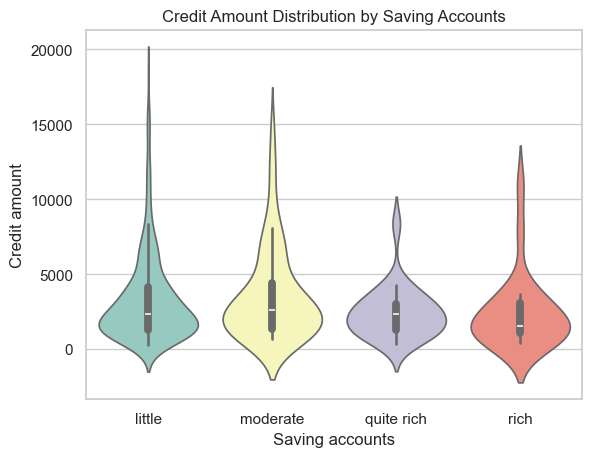

In [121]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette='Set3', hue="Saving accounts",legend=False)
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [122]:
df["Risk"].value_counts(normalize=True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

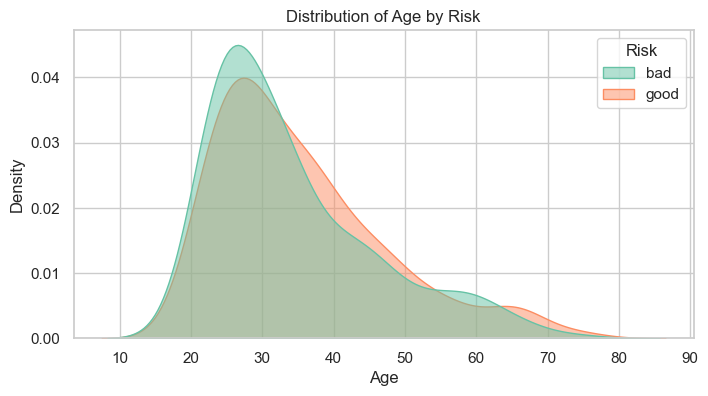

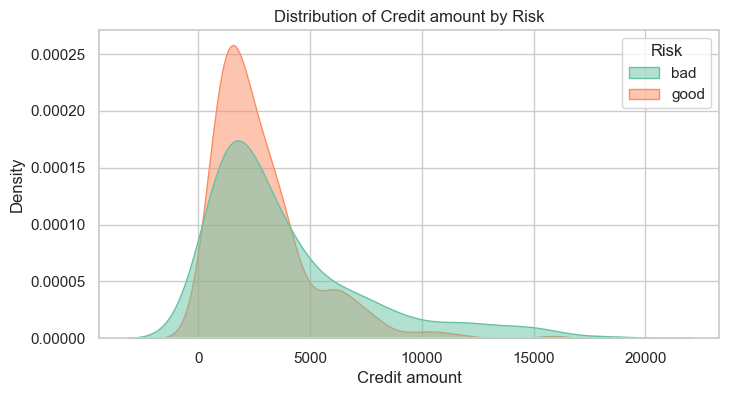

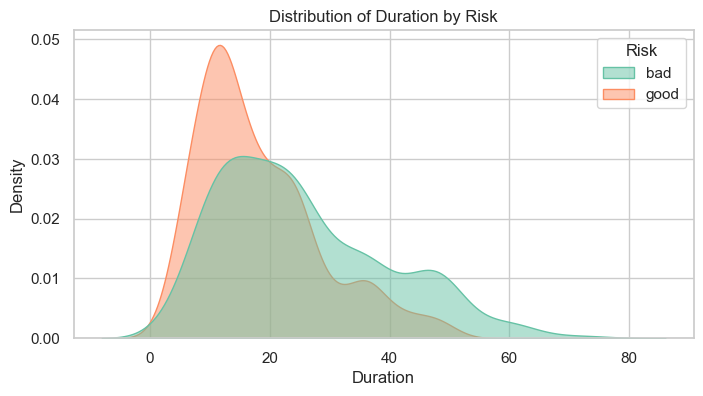

In [123]:
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=df, x=col, hue="Risk", fill=True, common_norm=False, alpha=0.5, palette='Set2')
    plt.title(f'Distribution of {col} by Risk')
    plt.show()

In [124]:
df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


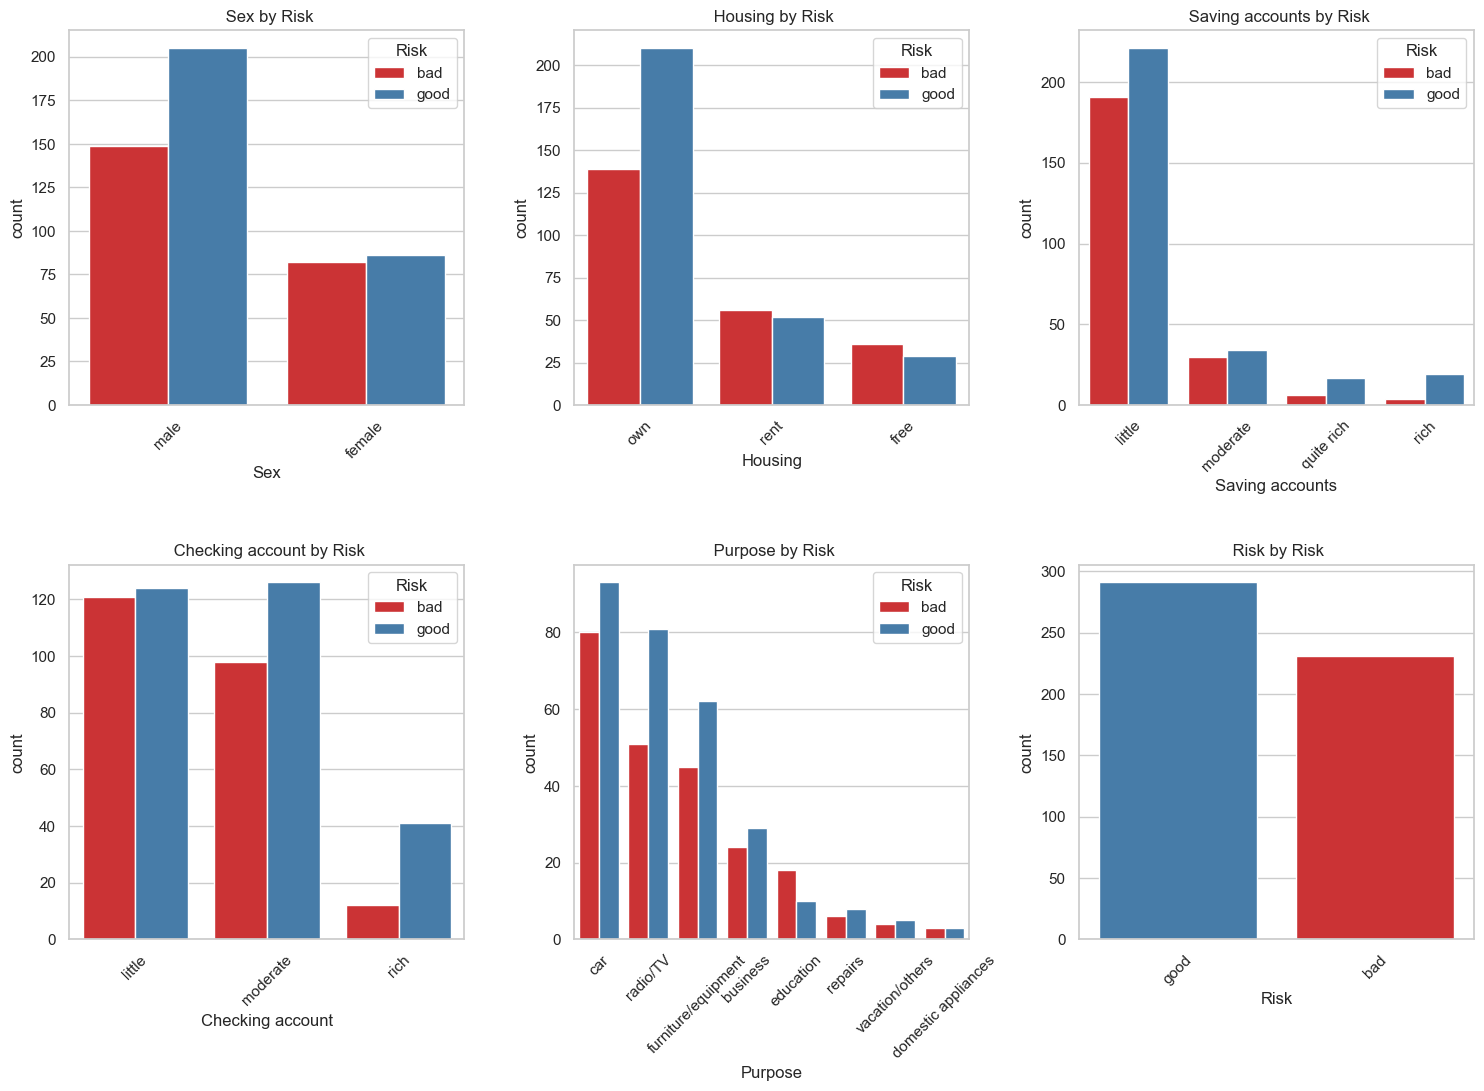

In [125]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, hue="Risk", palette='Set1', order=df[col].value_counts().index)
    plt.title(f' {col} by Risk')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [126]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount", "Duration"]

In [127]:
target = "Risk"

In [128]:
print(df.columns)

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')


In [129]:
df_model = df[features + [target]].copy()

In [130]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [131]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [132]:
cat_col = df_model.select_dtypes(include=['object']).columns.drop("Risk")

In [133]:
le_dict = {}

In [134]:
for col in cat_col:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [135]:
le_target = LabelEncoder()

In [136]:
df_model[target] = le_target.fit_transform(df_model[target])

In [137]:
df_model[target] 

0      0
1      1
2      0
3      1
4      0
      ..
517    1
518    1
519    1
520    0
521    1
Name: Risk, Length: 522, dtype: int64

In [138]:
df_model[target].value_counts()

Risk
1    291
0    231
Name: count, dtype: int64

In [139]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [140]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [141]:
from sklearn.model_selection import train_test_split

In [143]:
X = df_model[features]
y = df_model[target]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

In [145]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((417, 8), (105, 8), (417,), (105,))

In [151]:
%pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.2 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

In [155]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_

In [157]:
dt = DecisionTreeClassifier(random_state=12, class_weight='balanced')
df_param_grid = { 
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [158]:
best_dt, acc_dt, params_dt = train_model(dt, df_param_grid, X_train, y_train, X_test, y_test)

In [159]:
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.6


In [160]:
print("Best Parameters:", params_dt)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [161]:
rf = RandomForestClassifier(random_state = 1, class_weight = "balanced", n_jobs = -1)

In [164]:
rf_param_grid = {
    'n_estimators': [100,200],
    'max_depth': [ 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [165]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [166]:
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.6857142857142857


In [167]:
print("Best Parameters:", params_rf)

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [174]:
et = ExtraTreesClassifier(random_state=12, class_weight='balanced', n_jobs=-1)

In [176]:
et_param_grid = {
    'n_estimators': [100,200],
    'max_depth': [ 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [180]:
best_et, acc_et, params_et = train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [181]:
print("Extra Trees Accuracy:", acc_et)

Extra Trees Accuracy: 0.6095238095238096


In [182]:
print("Best Parameters:", params_et)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [183]:
xgb = XGBClassifier(random_state=12, scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum(),  use_label_encoder=False, eval_metric='logloss', n_jobs=-1)

In [184]:
xgb_param_grid = {
    'n_estimators': [100,200],
    'max_depth': [ 3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0]
}

In [185]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

/Users/satesilka/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [23:45:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/satesilka/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [23:45:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/satesilka/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [23:45:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/satesilka/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [23:45:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warni

In [186]:
print("XGBoost Accuracy:", acc_xgb)

XGBoost Accuracy: 0.6857142857142857


In [188]:
print("XGBoost Parameters:", params_xgb)

XGBoost Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.7}


In [189]:
joblib.dump(best_rf, "random_forest_model.pkl")

['random_forest_model.pkl']

In [191]:
df_clean = pd.read_csv("german_credit_data.csv")

In [192]:
df_clean['Saving accounts'] = df_clean['Saving accounts'].fillna('little')
df_clean['Checking account'] = df_clean['Checking account'].fillna('little')

In [193]:
encoders = {}
cat_cols_map = {
    'Sex': 'Sex',
    'Housing': 'Housing',
    'Saving accounts': 'Saving_accounts',    
    'Checking account': 'Checking_account'   
}

In [194]:
for col_name, file_name_prefix in cat_cols_map.items():
    le = LabelEncoder()
    
    df_clean[col_name] = le.fit_transform(df_clean[col_name])
    
    
    joblib.dump(le, f'{file_name_prefix}_encoder.pkl')
    print(f"Saved: {file_name_prefix}_encoder.pkl")

Saved: Sex_encoder.pkl
Saved: Housing_encoder.pkl
Saved: Saving_accounts_encoder.pkl
Saved: Checking_account_encoder.pkl


In [195]:
features = ['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Credit amount', 'Duration']
X = df_clean[features]
y = df_clean['Risk'].map({'good': 1, 'bad': 0})

In [196]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=2, min_samples_split=10, random_state=42)
rf_model.fit(X, y)

joblib.dump(rf_model, 'random_forest_model.pkl')
print("Saved: random_forest_model.pkl")

Saved: random_forest_model.pkl
